#Training for Human detection starts here

In [ ]:
# from google.colab import drive
!pip3 install matplotlib==3.2.1
#!pip install matplotlib==3.2.1
root = './'
# drive.mount(root)

In [ ]:
# Making Directory

import os
from os.path import join

# mot = "My Drive/Colab Notebooks/MOT/"   # a custom path. you can change if you want to
MOT_PATH = 'MOT/' # join(root,mot)
!mkdir "{MOT_PATH}"

mkdir: cannot create directory ‘MOT/’: File exists


In [ ]:
import sys

motdata = join('fig 1- patient doctor.png')
sys.path.append(motdata)


img_ex_path = 'fig 1- patient doctor.png'

In [ ]:
# Example: Original picture before detection
import matplotlib.pylab as plt
import cv2

list_motdata = os.listdir(motdata)
list_motdata.sort()

img_ex_path = motdata + list_motdata[0]
img_ex_origin = cv2.imread(img_ex_path)
img_ex = cv2.cvtColor(img_ex_origin, cv2.COLOR_BGR2RGB)

plt.imshow(img_ex)
plt.axis('off')
plt.show()

NotADirectoryError: [Errno 20] Not a directory: 'fig 1- patient doctor.png'



---


**2. Object Detection with Faster R-CNN**

*  We will use a pretrained Faster R-CNN model using ResNet50 as a backbone with FPN.





---




In [ ]:
# Import required packages/modules first

from PIL import Image
import numpy as np
import torch
import torchvision
from torchvision import transforms as T

In [ ]:
# Download the pretrained Faster R-CNN model from torchvision

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)#.cuda()
model.eval()

In [ ]:
# Define the class names given by PyTorch's official Docs

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [ ]:
# Defining a function for get a prediction result from the model

def get_prediction(img_path, threshold):
  img = Image.open(img_path).convert('RGB') # Load the image
  transform = T.Compose([T.ToTensor()]) # Defing PyTorch Transform
  img = transform(img) # Apply the transform to the image
  pred = model([img]) # Pass the image to the model
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # Get the Prediction Score
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding boxes
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class

In [ ]:
threshold = 0.8
import time

img = Image.open(img_ex_path) # Load the image
transform = T.Compose([T.ToTensor()]) # Defing PyTorch Transform
img = transform(img) # Apply the transform to the image
start = time.time()
pred = model([img]) # Pass the image to the model
end = time.time()
print(end - start)

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [ ]:
img.shape

In [ ]:
pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # Get the Prediction Score
pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding boxes
pred_score = list(pred[0]['scores'].detach().numpy())
pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
pred_boxes = pred_boxes[:pred_t+1]
pred_class = pred_class[:pred_t+1]
pred_class

NameError: name 'pred' is not defined

In [ ]:
# Defining a api function for object detection

#def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=1.5, text_th=3):

 # boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
  #img = cv2.imread(img_path) # Read image with cv2
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  #for i in range(len(boxes)):
  #  cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
  #  cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
  #plt.figure(figsize=(15,20)) # display the output image
  # cv2.imwrite('fig 2- bounding box.png', img)
  #plt.imshow(img)
  #plt.xticks([])
  #plt.yticks([])
  #plt.show()/

def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=1.5, text_th=3):
    boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
    img = cv2.imread(img_path) # Read image with cv2
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
    for i in range(len(boxes)):
        pt1 = (int(boxes[i][0][0]), int(boxes[i][0][1]))
        pt2 = (int(boxes[i][1][0]), int(boxes[i][1][1]))
        print("Box Coordinates (pt1):", pt1)
        print("Box Coordinates (pt2):", pt2)
        cv2.rectangle(img, pt1, pt2, color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
        cv2.putText(img, pred_cls[i], pt1, cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0), thickness=text_th) # Write the prediction class
    plt.figure(figsize=(15,20)) # display the output image
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
# Example: After detection
object_detection_api(img_ex_path,threshold=0.8,rect_th=3, text_size=1.5, text_th=3)

NameError: name 'img_ex_path' is not defined

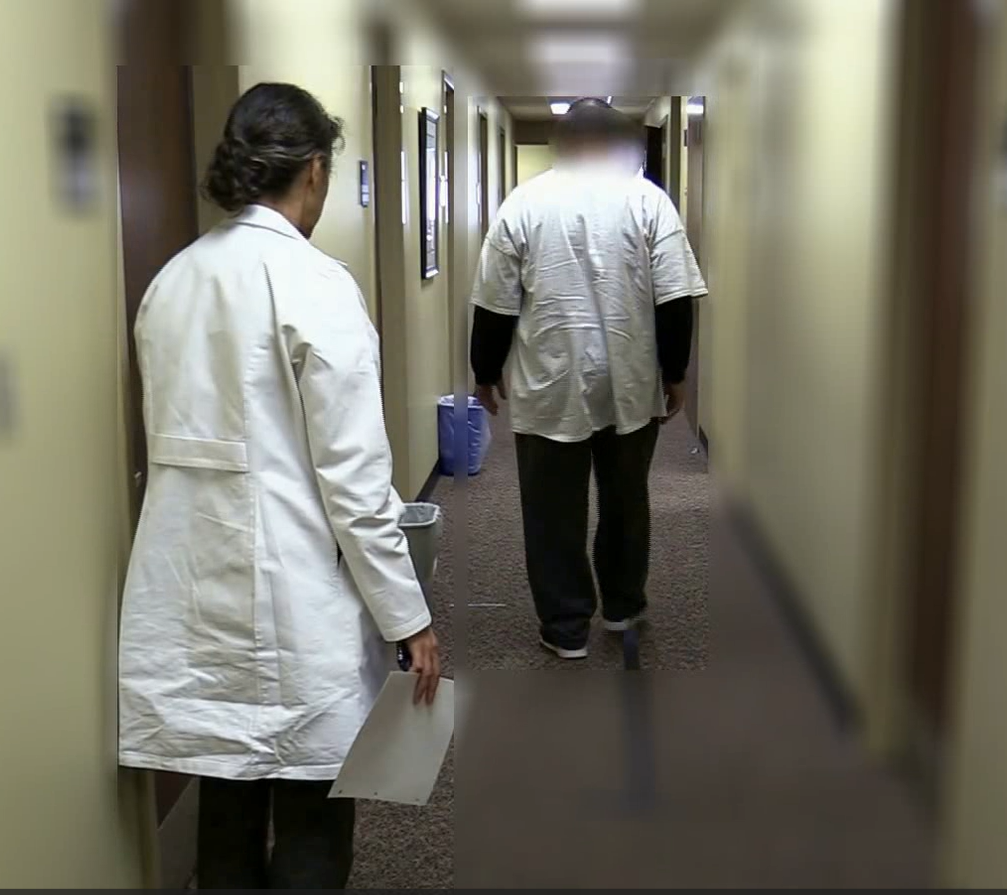

In [ ]:
from google.colab.patches import cv2_imshow
patient = cv2.imread('fig 1- patient doctor.png')
patient.shape
cv2_imshow(patient)

In [ ]:
img.shape

NameError: name 'img' is not defined

In [ ]:
ataxia_path = 'fig 1- patient doctor.png'

Box Coordinates (pt1): (462, 93)
Box Coordinates (pt2): (701, 671)
Box Coordinates (pt1): (116, 61)
Box Coordinates (pt2): (457, 865)


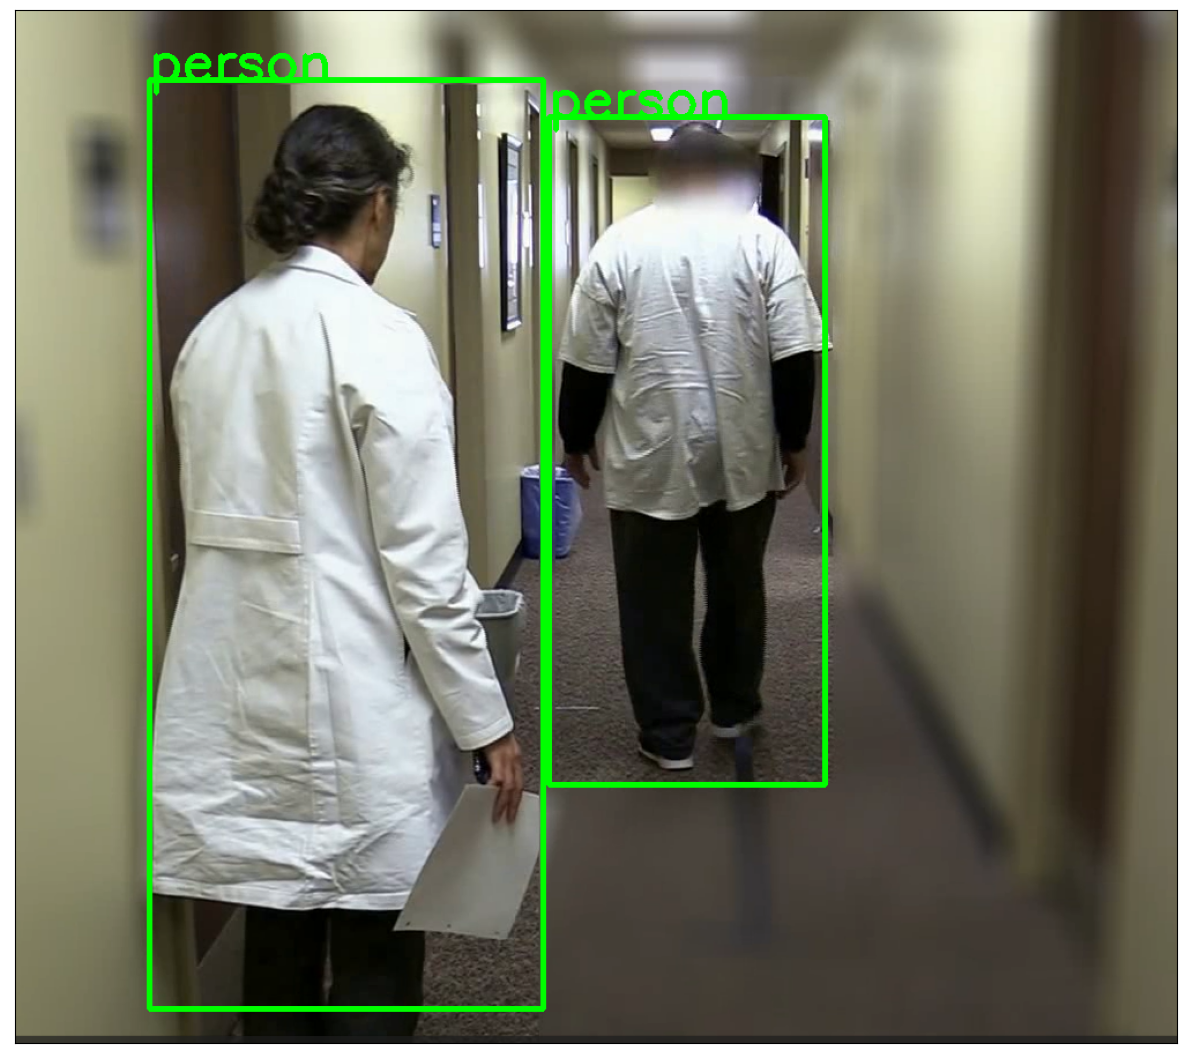

In [ ]:
# Example: After detection
object_detection_api(ataxia_path, threshold=0.8)

In [ ]:
def crop_img(img, box):
  h = int(-box[0][1]+box[1][1]+0.5)
  w = int(-box[0][0]+box[1][0]+0.5)
  y = int(box[0][1]+0.5)
  x = int(box[0][0]+0.5)
  b = int(0.02*h)
  cropped_img = img[max(0,y-b):min(y+h+b, len(img)), max(0,x-b):min(x+w+b, len(img[0]))]
  return cropped_img

In [ ]:
#def show_person(img_path, threshold=0.5, rect_th=3, text_size=1.5, text_th=3):

 # boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
  #img = cv2.imread(img_path) # Read image with cv2
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  #for i in range(len(boxes)):
   # if pred_cls[i] == 'person':
    #  break
  #cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
  # cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
  #print(boxes[i])
  #cropped_img = crop_img(img, boxes[i])
  #plt.figure(figsize=(5,7)) # display the output image
  #plt.imshow(cropped_img)
  #plt.xticks([])
  #plt.yticks([])
  #plt.show()

def show_person(img_path, threshold=0.5, rect_th=3, text_size=1.5, text_th=3):
    boxes, pred_cls = get_prediction(img_path, threshold)  # Get predictions
    img = cv2.imread(img_path)  # Read image with cv2
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    person_found = False
    for i in range(len(boxes)):
        if pred_cls[i] == 'person':
            person_found = True
            pt1 = (int(boxes[i][0][0]), int(boxes[i][0][1]))
            pt2 = (int(boxes[i][1][0]), int(boxes[i][1][1]))
            print("Box Coordinates (pt1):", pt1)
            print("Box Coordinates (pt2):", pt2)
            cv2.rectangle(img, pt1, pt2, color=(0, 255, 0), thickness=rect_th)  # Draw Rectangle with the coordinates
            org = pt1  # Text position (same as pt1)
            cv2.putText(img, pred_cls[i], org, cv2.FONT_HERSHEY_SIMPLEX, text_size, (0, 255, 0), thickness=text_th)  # Write the prediction class
            cropped_img = crop_img(img, boxes[i])
            plt.figure(figsize=(5, 7))  # display the output image
            plt.imshow(cropped_img)
            plt.xticks([])
            plt.yticks([])
            plt.show()
            break

    if not person_found:
        print("No person detected in the image.")

Box Coordinates (pt1): (462, 93)
Box Coordinates (pt2): (701, 671)


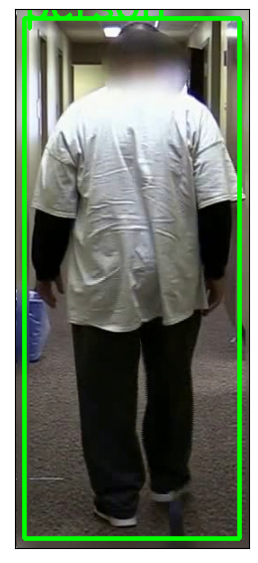

In [ ]:
show_person(ataxia_path,threshold=0.8)





*   The picture above is an example of applying Detection Network (in our case, Faster R-CNN).
*   Since the purpose of dataset we are using is 'tracking', you can see that most of the detected classes are 'person'.
*   We need a prediction result (bbs offset, class label, pred scores) for all the images.






---


**3. Object ID Tracking with SORT**


*   Simple Online and Realtime Tracking (SORT) algorithm for object ID tracking

---



In [ ]:
# Git clone: SORT Algorithm

git clone https://github.com/abewley/sort.git

sort = join(MOT_PATH,'sort/')
sys.path.append(sort)

/bin/bash: line 1: cd: {MOT_PATH}: No such file or directory
Cloning into 'sort'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 208 (delta 2), reused 2 (delta 1), pack-reused 202
Receiving objects: 100% (208/208), 1.21 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (74/74), done.


NameError: name 'join' is not defined

In [ ]:
# requirement for sort
!cd "{sort}";pip install -r requirements.txt

In [ ]:
# Optional: if error occurs, you might need to re-install scikit-image and imgaug

#!pip uninstall scikit-image -y
#!pip uninstall imgaug -y
#!pip install imgaug
#!pip install -U scikit-image

#import skimage
#print(skimage.__version__)

In [ ]:
!export MPLBACKEND=TKAgg
!pip install tk
!sudo apt-get install xvfb


In [ ]:
import matplotlib
import tkinter
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt


In [ ]:
import json
import collections
from pprint import pprint
from sort import *

jsonpath = join(MOT_PATH,'COSE474/3_MOT_detinfo.json')

with open(jsonpath) as data_file:
   data = json.load(data_file)
odata = collections.OrderedDict(sorted(data.items()))

In [ ]:
# Let's check out downloaded json file

pprint(odata)

In [ ]:
img_path = motdata    # img root path

# Making new directory for saving results
save_path = join(MOT_PATH,'save/')
!mkdir "{save_path}"

In [ ]:
mot_tracker = Sort()      # Tracker using SORT Algorithm

In [ ]:
for key in odata.keys():
    arrlist = []
    det_img = cv2.imread(os.path.join(img_path, key))
    overlay = det_img.copy()
    det_result = data[key] # find the format from det_result and put the info from prediction

    for info in det_result:
        bbox = info['bbox']
        labels = info['labels']
        scores = info['scores']
        templist = bbox+[scores]

        if labels == 1: # label 1 is a person in MS COCO Dataset
            arrlist.append(templist)

    track_bbs_ids = mot_tracker.update(np.array(arrlist))

    mot_imgid = key.replace('.jpg','')
    newname = save_path + mot_imgid + '_mot.jpg'
    print(mot_imgid)

    for j in range(track_bbs_ids.shape[0]):
        ele = track_bbs_ids[j, :]
        x = int(ele[0])
        y = int(ele[1])
        x2 = int(ele[2])
        y2 = int(ele[3])
        track_label = str(int(ele[4]))
        cv2.rectangle(det_img, (x, y), (x2, y2), (0, 255, 255), 4)
        cv2.putText(det_img, '#'+track_label, (x+5, y-10), 0,0.6,(0,255,255),thickness=2)

    cv2.imwrite(newname,det_img)

## SORT algorithm start


**Display image**

In [ ]:
from google.colab.patches import cv2_imshow
import math

def resize_and_show(image):
  DESIRED_HEIGHT = 720
  DESIRED_WIDTH = 720
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

In [ ]:
def crop_coordinate(img, x1,y1,x2,y2):
  h = int(-y1+y2+0.5)
  w = int(-x1+x2+0.5)
  y = int(y1+0.5)
  x = int(x1+0.5)
  b = int(0.02*h)
  cropped_img = img[max(0,y-b):min(y+h+b, len(img)), max(0,x-b):min(x+w+b, len(img[0]))]
  return cropped_img

In [ ]:
frame_h = img.shape[1]
frame_w = img.shape[2]
(frame_h, frame_w)

In [ ]:
transform = T.Compose([T.ToTensor()]) # Defing PyTorch Transform

def format_pred(img_path, min_score):
  image = Image.open(img_path) # Load the image
  image = transform(image).cuda() # Apply the transform to the image
  pred = model([image])
  mask = (pred[0]['labels'] == 1) & (pred[0]['scores'] > min_score)
  boxes = pred[0]['boxes'][mask].tolist()
  labels = pred[0]['labels'][mask].tolist()
  scores = pred[0]['scores'][mask].tolist()

  det_list = []
  for i in range(len(boxes)):
    box = boxes[i]
    label = labels[i]
    score = scores[i]
    det_list.append({'bbox':box, 'labels':1, 'scores':score})

  return det_list

In [ ]:
det_img = cv2.imread('MOT/save/000007_mot.jpg')
resize_and_show(det_img)

In [ ]:
for key in odata.keys(): # Change this to video frame by frame reading
    arrlist = []
    det_img = cv2.imread(os.path.join(img_path, key))
    # overlay = det_img.copy()
    det_result = format_pred(os.path.join(img_path, key), 0.9) #data[key]
    # find the format from det_result and put the info from prediction
    print(key)

    for info in det_result:
        bbox = info['bbox']
        labels = info['labels']
        scores = info['scores']
        templist = bbox+[scores]

        if labels == 1: # label 1 is a person in MS COCO Dataset
            arrlist.append(templist)

    track_bbs_ids = mot_tracker.update(np.array(arrlist))

    # mot_imgid = key.replace('.jpg','')
    # newname = save_path + mot_imgid + '_mot.jpg'
    # print(mot_imgid)

    for j in range(track_bbs_ids.shape[0]):
        ele = track_bbs_ids[j, :]
        x = int(ele[0])
        y = int(ele[1])
        x2 = int(ele[2])
        y2 = int(ele[3])
        track_label = str(int(ele[4]))

        # crop each person with x,y,x2,y2
        cropped_img = crop_coordinate(det_img, x,y,x2,y2)
        # identify landmarks
        # make a directory for 'track_label'
        # save if full human visible. discard if width below
        if not os.path.exists('MOT/save/'+track_label):
            os.makedirs('MOT/save/'+track_label)
        # save cropped video and landmark data in separate folders
        cv2.imwrite('MOT/save/'+track_label+'/per_'+track_label+'_'+key, cropped_img)

In [ ]:
mot_tracker = Sort()

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



In [ ]:
import torch
import torchvision
import cv2
import numpy as np
from sort import Sort
import os

# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Initialize SORT tracker
tracker = Sort()

# Set confidence threshold for detections
confidence_threshold = 0.5

# Read video file
video_path = '/content/Bruns ataxia.mp4'
cap = cv2.VideoCapture(video_path)

# Calculate the frame rate of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Set the duration to process (6 seconds)
duration = 6  # seconds
num_frames_to_read = int(fps * duration)

# Create a directory to save frames
output_directory = 'C:\\Users\\HP\\Desktop\\Dissertation\\pipeline_img'
os.makedirs(output_directory, exist_ok=True)

# Process frames until the desired duration or 'q' key press
for i in range(num_frames_to_read):
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to tensor and normalize
    frame_tensor = torch.from_numpy(frame / 255.0).permute(2, 0, 1).unsqueeze(0).float()

    # Perform inference
    with torch.no_grad():
        predictions = model(frame_tensor)[0]

    # Post-process predictions
    for box, score, label in zip(predictions['boxes'], predictions['scores'], predictions['labels']):
        if score > confidence_threshold:
            x1, y1, x2, y2 = box.int()

            # Check if the detected entity is a patient or doctor based on the label
            if label == 1:  # Assuming label 1 corresponds to 'person'
                entity_type = 'patient'
                color = (0, 255, 0)  # Green for patients
            else:
                entity_type = 'doctor'
                color = (0, 0, 255)  # Red for doctors

            # Track the detected entity using SORT
            dets = np.array([[x1, y1, x2, y2, score]])
            trackers = tracker.update(dets)

            # Draw bounding box around the entity
            for track in trackers:
                cv2.rectangle(frame, (int(track[0]), int(track[1])), (int(track[2]), int(track[3])), color, 2)
                cv2.putText(frame, entity_type, (int(track[0]), int(track[1])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Save the frame with tracked entities
    output_file = os.path.join(output_directory, f'frame_{i:04d}.jpg')
    cv2.imwrite(output_file, frame)

    # Display the ongoing image with tracked entities
    cv2.imshow('Ongoing Image', frame)
    key = cv2.waitKey(1)  # Check for key press every 1 millisecond

    # Check for 'q' key press to quit
    if key == ord('q'):
        break

# Release the video capture
cap.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'sort'

In [ ]:
import cv2
import torch
import torchvision
import os
from torchvision.transforms import functional as F

# Load the pre-trained object detection model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Function to detect persons in a frame
def detect_persons(frame):
    with torch.no_grad():
        # Convert the frame to a PyTorch tensor
        img_tensor = F.to_tensor(frame)

        # Perform object detection on the frame
        predictions = model([img_tensor])

        # Extract bounding boxes and labels from the predictions
        persons = []
        for prediction in predictions:
            for score, bbox, _ in zip(prediction['scores'], prediction['boxes'], prediction['labels']):
                score = score.item()
                if score > 0.8 and _.item() == 1:  # Threshold for detection confidence and label for 'person'
                    bbox = [int(coord) for coord in bbox]
                    persons.append(bbox)
        return persons

# Open the video file
video_path = '22.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Create folder to store the output images
output_folder = '/content/output_frames'
os.makedirs(output_folder, exist_ok=True)

# Process each frame
for frame_count in range(min(180, total_frames)):  # Process first 6 seconds or all frames if video is shorter
    ret, frame = cap.read()
    if not ret:
        break

    # Detect persons in the frame
    persons = detect_persons(frame)

    # Draw bounding boxes around detected persons and label them
    for i, person_bbox in enumerate(persons, 1):
        x1, y1, x2, y2 = person_bbox
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f'Person {i}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Save the frame as an image with labels
    output_file = os.path.join(output_folder, f'frame_{frame_count:04d}.jpg')
    cv2.imwrite(output_file, frame)

    # Display the frame with detected persons
    #cv2.imshow('Frame', frame)

    # Check for 'q' key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


In [ ]:
!zip -r '/content/output_person1.zip' '/content/output_person1'

  adding: content/output_person1/ (stored 0%)
  adding: content/output_person1/person1_frame_0060.jpg (deflated 1%)
  adding: content/output_person1/person1_frame_0039.jpg (deflated 0%)
  adding: content/output_person1/person1_frame_0131.jpg (deflated 1%)
  adding: content/output_person1/person1_frame_0032.jpg (deflated 0%)
  adding: content/output_person1/person1_frame_0109.jpg (deflated 1%)
  adding: content/output_person1/person1_frame_0129.jpg (deflated 1%)
  adding: content/output_person1/person1_frame_0019.jpg (deflated 0%)
  adding: content/output_person1/person1_frame_0047.jpg (deflated 0%)
  adding: content/output_person1/person1_frame_0093.jpg (deflated 1%)
  adding: content/output_person1/person1_frame_0062.jpg (deflated 1%)
  adding: content/output_person1/person1_frame_0011.jpg (deflated 0%)
  adding: content/output_person1/person1_frame_0074.jpg (deflated 1%)
  adding: content/output_person1/person1_frame_0025.jpg (deflated 0%)
  adding: content/output_person1/person1_fra

In [ ]:
import cv2
import torch
import torchvision
import os
from torchvision.transforms import functional as F

# Load the pre-trained object detection model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Function to detect persons in a frame
def detect_persons(frame):
    with torch.no_grad():
        # Convert the frame to a PyTorch tensor
        img_tensor = F.to_tensor(frame)

        # Perform object detection on the frame
        predictions = model([img_tensor])

        # Extract bounding boxes and labels from the predictions
        persons = []
        for prediction in predictions:
            for score, bbox, _ in zip(prediction['scores'], prediction['boxes'], prediction['labels']):
                score = score.item()
                if score > 0.8 and _.item() == 1:  # Threshold for detection confidence and label for 'person'
                    bbox = [int(coord) for coord in bbox]
                    persons.append(bbox)
        return persons

# Open the video file
video_path = '22.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Create folder to store the output images for person 1
output_folder_person1 = '/content/output_person1'
os.makedirs(output_folder_person1, exist_ok=True)

# Process each frame
for frame_count in range(min(180, total_frames)):  # Process first 6 seconds or all frames if video is shorter
    ret, frame = cap.read()
    if not ret:
        break

    # Detect persons in the frame
    persons = detect_persons(frame)

    # Extract images for person 1 only
    for i, person_bbox in enumerate(persons, 1):
        if i == 1:
            x1, y1, x2, y2 = person_bbox
            person1_crop = frame[y1:y2, x1:x2].copy()
            cv2.imwrite(os.path.join(output_folder_person1, f'person1_frame_{frame_count:04d}.jpg'), person1_crop)
            break  # Only process the first person 1 detected in the frame

# Release resources
cap.release()
cv2.destroyAllWindows()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
